# Project: Discovering Medical No-Show Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> We will examine a dataset with information from 100k medical appointments in Brazil. It focuses on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. These characteristics, in particular "Gender", "Neighbourhood" and "Scholarship". I will investigate, if their is any association to the dependent variable "No_show".

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [207]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [208]:
df.shape

(110527, 14)

In [209]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing values in this dataframe.

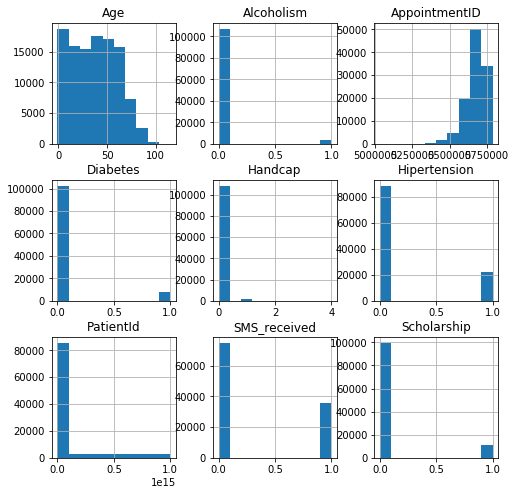

In [211]:
df.hist(figsize=(8, 8));

We see, that overall more people show up at their medical appointment.

###  Data Cleaning

> Since the columns PatientId and AppointmentID seem to be generated on a rolling basis, their values are probably random and thus have no value for us so that we can get rid of them for further analysis.

In [212]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

Confirming the deleting of the two columns PatientId and AppointmentID

In [213]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Since "-" doesn't work for variable or column names, I rename the "No-show" column to "No_show".

In [214]:
df.rename(columns={"No-show": "No_show"}, inplace=True)

Confirming the renaming of the No_show column

In [215]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Converting No_show from object to integer, so that I can better apply built-in math functions. No --> 0 (False), Yes --> 1 (True)

In [216]:
mapping = {'Yes': 1, 'No': 0}

In [217]:
df.replace({'No_show': mapping}, inplace=True)

Checking, if No_show was converted to an integer

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null int64
dtypes: int64(8), object(4)
memory usage: 10.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Q1: Is "Gender" associated with medical no-show appointments?
We are interested in the question, if a particular gender tends to more often not show (or show) up.

In [219]:
# Before beginning: let's create two variables, that declare a "show" or "no-show".
showed = df.No_show == False
no_showed = df.No_show == True

In [220]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

We see that a lot more female than male data is represented in the dataframe. Thus we later calculate the proportions, to get a clearer picture of the no-show rates of males and females. For now, let's take q quick look at the absolute statistics.

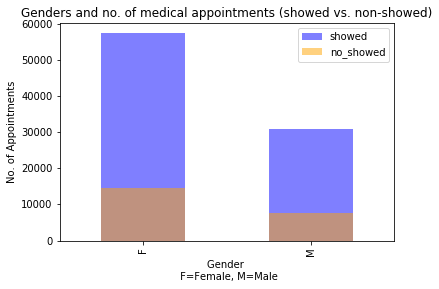

In [221]:
df.Gender[showed].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='showed')
df.Gender[no_showed].value_counts().plot(kind='bar', alpha=0.5, color='orange', label='no_showed')
plt.xlabel('Gender \n F=Female, M=Male')
plt.ylabel('No. of Appointments')
plt.title('Genders and no. of medical appointments (showed vs. non-showed)')
plt.legend();

It seems like the proportion of male and female no-show rates is equal, but we want to know this more accurate. Let's calculate the exact proportion for the show-up repectively no-show of females and males.

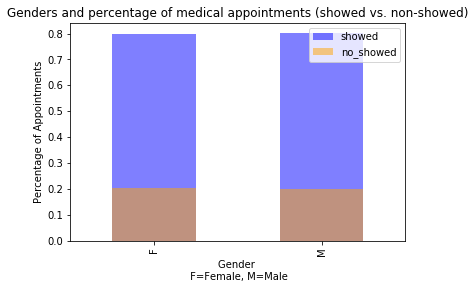

In [222]:
showed_genders = df.Gender[showed].value_counts()
no_showed_genders = df.Gender[no_showed].value_counts()
all_genders = df.Gender.value_counts()

prop_showed_genders = showed_genders / all_genders
prop_no_showed_genders = no_showed_genders / all_genders

prop_showed_genders.plot(kind='bar', alpha=0.5, color='blue', label='showed')
prop_no_showed_genders.plot(kind='bar', alpha=0.5, color='orange', label='no_showed')
plt.xlabel('Gender \n F=Female, M=Male')
plt.ylabel('Percentage of Appointments')
plt.title('Genders and percentage of medical appointments (showed vs. non-showed)')
plt.legend();


### Conclusion of question 1:
Males & Females both roughly show up to 80% to their medical appointments (and respectively don't show up around 20%). Thus, there is no real difference between the genders and their no-show rate.

### Q2: Is "Neighbourhood" associated with medical no-show appointments?
Are there people or patients from certain neighbourhoods that more often don't show up at their medical appointment?

First, I would like to examine the average no_show rate of Neighbourhoods of the top 5 and last 5 from all Neighborhoods. I restict my view to these 10 rows for a better overview, since we have over 80 neighbourhoods in total.

In [223]:
df.groupby('Neighbourhood').No_show.mean().sort_values(ascending=False).iloc[np.r_[0:5, -5:0]]

Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
SOLON BORGES                   0.147122
MÁRIO CYPRESTE                 0.145553
AEROPORTO                      0.125000
ILHA DO BOI                    0.085714
PARQUE INDUSTRIAL              0.000000
Name: No_show, dtype: float64

Now I plot my results.

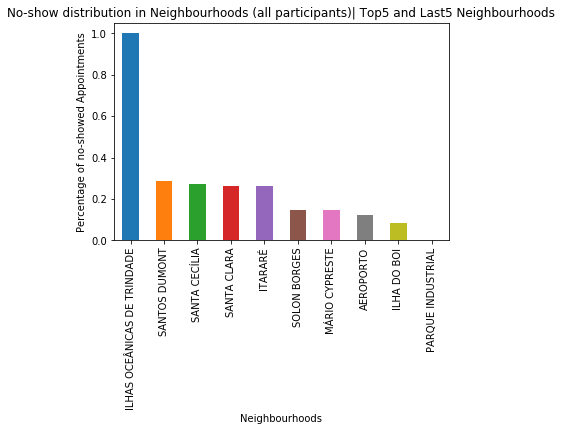

In [224]:
df.groupby('Neighbourhood').No_show.mean().sort_values(ascending=False).iloc[np.r_[0:5, -5:0]].plot(kind='bar', label='');
plt.xlabel('Neighbourhoods')
plt.ylabel('Percentage of no-showed Appointments')
plt.title('No-show distribution in Neighbourhoods (all participants)| Top5 and Last5 Neighbourhoods')
plt.legend();

Since the values ILHAS OCEÂNICAS DE TRINDADE = 1 (100% no-show rate) and PARQUE INDUSTRIAL = 0 seem a little bit to strong in each respective dimension I would like to check their "amount of participants" in our sample. Since they just have 2 and 1 participants I decide get rid of these "low" values and just will examine neighbourhoods with more than 100 participants in the next step.

In [225]:
df['Neighbourhood'].value_counts().iloc[np.r_[0:5, -5:0]]

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, dtype: int64

In [226]:
v = df['Neighbourhood'].value_counts()

In [227]:
neighbourhoods_with_more_100_people = df[df.Neighbourhood.isin(v.index[v.gt(99)])]

In [228]:
neighbourhoods_with_more_100_people.groupby('Neighbourhood').No_show.mean().sort_values(ascending=False).iloc[np.r_[0:5, -5:0]]

Neighbourhood
SANTOS DUMONT        0.289185
SANTA CECÍLIA        0.274554
SANTA CLARA          0.264822
ITARARÉ              0.262664
JESUS DE NAZARETH    0.243954
SANTA MARTHA         0.158416
DO CABRAL            0.157143
DE LOURDES           0.154098
SOLON BORGES         0.147122
MÁRIO CYPRESTE       0.145553
Name: No_show, dtype: float64

There are significant differences between the Neighborhoods and their no-show rates. While for example in MÁRIO CYPRESTE the no-show rate is around 14.5%, the no-show rate from SANTOS DUMONT participants is almost 29%.

Now I plot again the new top5 and last5 Neighbourhoods with over 100 people.

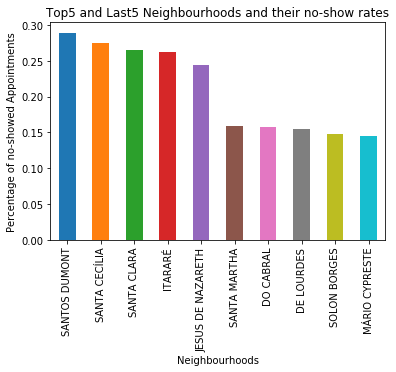

In [229]:
Neighbourhoods_with_more_100_people.groupby('Neighbourhood').No_show.mean().sort_values(ascending=False).iloc[np.r_[0:5, -5:0]].plot(kind='bar', label='')
plt.xlabel('Neighbourhoods')
plt.ylabel('Percentage of no-showed Appointments')
plt.title('Top5 and Last5 Neighbourhoods and their no-show rates')
plt.legend();


### Conclusion of question 2:
There is an association between Neighbourhoods and no-show rate - in some regions no-show rates are almost 100% higher than in regions where no-show rates are low.

### Q3 Is "Scholarship" associated with medical no-show appointments?

‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Bolsa Família is a social welfare program of the Government of Brazil. Bolsa Família provides financial aid to poor Brazilian families. Let's see if one of the groups has a higher percentage of no-show rates than the other.

In [230]:
df.groupby('Scholarship').No_show.mean()

Scholarship
0    0.198072
1    0.237363
Name: No_show, dtype: float64

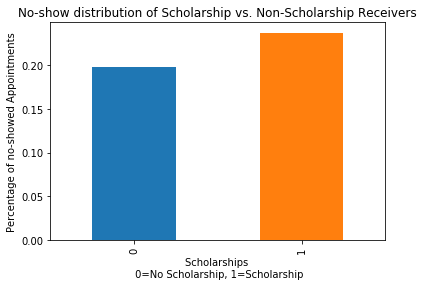

In [231]:
df.groupby('Scholarship').No_show.mean().plot(kind='bar', label= "")
plt.xlabel('Scholarships \n 0=No Scholarship, 1=Scholarship')
plt.ylabel('Percentage of no-showed Appointments')
plt.title('No-show distribution of Scholarship vs. Non-Scholarship Receivers')
plt.legend();


### Conclusion of question 3:
It seems like that the poorer families (those who receive the scholarship), more often (23.73%) have no-shows at their medical appointments than the Non-Scholarship receivers (19.81%).

<a id='conclusions'></a>
## Conclusions

<li> We found that there is no particular difference between the no-show rates from males and females, both are around 20%.
<li> We found that there is a difference between neighbourhoods and no-show rates. Neighbourhoods (where the sample is n>=100) and their no-showrates vary between 14.55% and 28.91%.
<li> It seems like Scholarship reveivers (i.e. poorer families) have a higher no-show rate (23.73%) than non-Scholarship receivers (19.81%)

In [232]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0